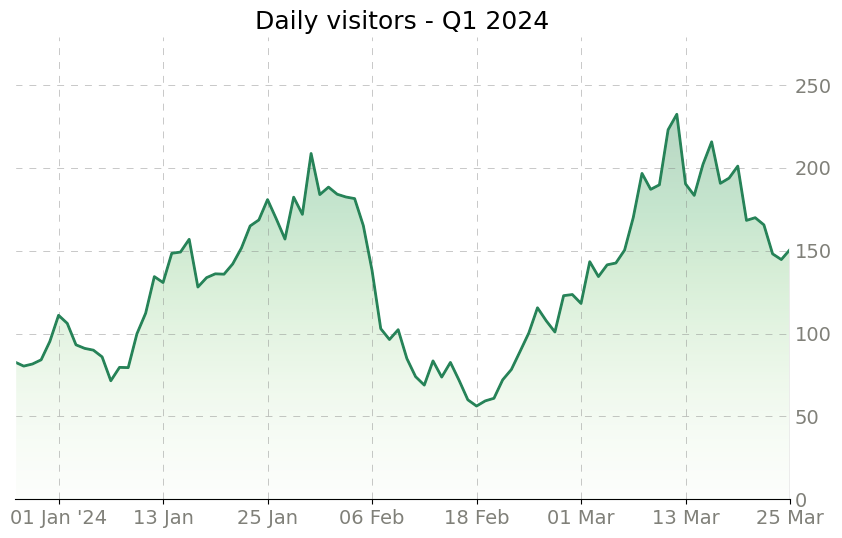

In [10]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import rcParams
from matplotlib.path import Path
from matplotlib.patches import PathPatch

np.random.seed(38)

# Data generation
dates = pd.date_range(start='2024-01-01', periods=90, freq='D')
initial_rate = 75
drift = 0.003
volatility = 0.1
returns = np.random.normal(drift, volatility, len(dates))
rates = initial_rate * np.cumprod(1 + returns)

x, y = dates, rates

# General parameters
fig, ax = plt.subplots(figsize=(10, 6))
plt.title("Daily visitors - Q1 2024", fontsize=18, color="black")
rcParams['font.family'] = 'DejaVu Sans'
rcParams['font.size'] = 14

# Axis Y to the right
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")

# Axis
x_interval = 12
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d %b"))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=x_interval))

ax.yaxis.set_major_locator(ticker.MultipleLocator(50))

# Grid
ax.grid(color="gray", linestyle=(0, (10, 10)), linewidth=0.5, alpha=0.6)
ax.tick_params(axis="x", colors="black")
ax.tick_params(axis="y", left=False, labelleft=False)

# Borders
ax.spines["top"].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines["bottom"].set_color("black")
ax.spines['left'].set_color('white')
ax.spines['left'].set_linewidth(1)

# Remove ticks from axis Y
ax.tick_params(axis='y', length=0)

# Add year to the first date on the axis
def custom_date_formatter(t, pos, dates, x_interval):
    date = dates[pos*x_interval]
    if pos == 0:
        return date.strftime('%d %b \'%y')
    else:
        return date.strftime('%d %b')
ax.xaxis.set_major_formatter(ticker.FuncFormatter((lambda x, pos: custom_date_formatter(x, pos, dates=dates, x_interval=x_interval))))

# Ticks label color
[t.set_color('#808079') for t in ax.yaxis.get_ticklabels()]
[t.set_color('#808079') for t in ax.xaxis.get_ticklabels()]


# Gradient
numeric_x = np.array([i for i in range(len(x))])
numeric_x_patch = np.append(numeric_x, max(numeric_x))
numeric_x_patch = np.append(numeric_x_patch[0], numeric_x_patch)
y_patch = np.append(y, 0)
y_patch = np.append(0, y_patch)

path = Path(np.array([numeric_x_patch, y_patch]).transpose())
patch = PathPatch(path, facecolor='none')
plt.gca().add_patch(patch)

ax.imshow(numeric_x.reshape(len(numeric_x), 1),  interpolation="bicubic",
                cmap=plt.cm.Greens,
                origin='lower',
                alpha=0.3,
                extent=[min(numeric_x), max(numeric_x), min(y_patch), max(y_patch) * 1.2],
                aspect="auto", clip_path=patch, clip_on=True)

# Plotting main line
y_chart = y_patch
y_chart[0] = y_chart[1]
y_chart[-1] = y_chart[-2]
ax.plot(numeric_x_patch, y_chart, color='#268358', linewidth=2)

# fix a grey line of imshow
ax.plot([max(numeric_x_patch), max(numeric_x_patch)], [0, max(y)], color='white', linewidth=2)

plt.savefig('high_quality_plot.png', dpi=300, bbox_inches='tight')
plt.show()